/tmp/ipykernel_850802/978406327.py:72: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  ax = sns.violinplot(x="Model_Size_Label", y="WBR",hue="Model_Family", data=wbr_long, inner="box", scale="width", order=ordered_labels_unique, palette=colors)


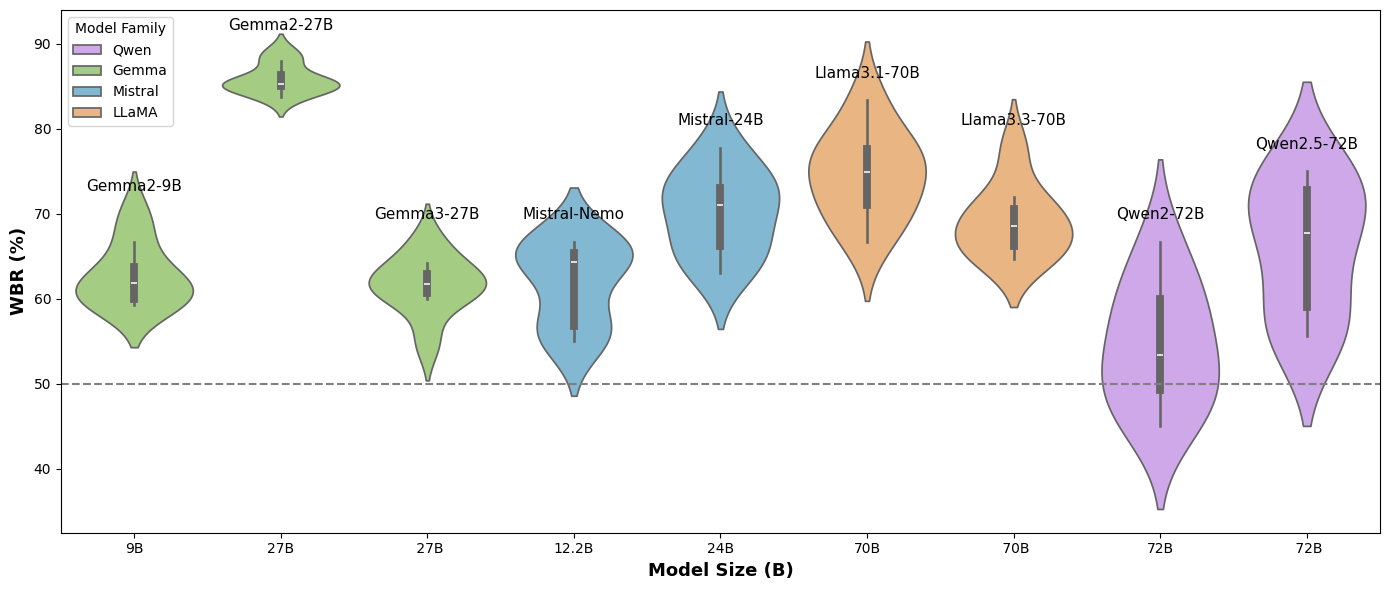

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import defaultdict

# Create WBR DataFrame
wbr_values_only = pd.DataFrame({
    "Qwen2-72B":     [54.62, 52.17, 47.06, 50.00, 60.00, 66.67, 45.00, 60.00],
    "Qwen2.5-72B":   [74.42, 75.00, 55.88, 55.56, 68.00, 72.22, 60.00, 67.50],
    "Gemma2-9B":      [62.72, 60.87, 62.75, 59.26, 70.00, 66.67, 60.00, 60.00],
    "Gemma2-27B":     [85.71, 83.70, 85.29, 85.19, 88.00, 88.89, 85.00, 85.00],
    "Gemma3-27B":    [64.20, 61.54, 54.90, 60.87, 62.00, 66.67, 60.00, 62.50],
    "Mistral-24B":   [72.66, 69.57, 66.67, 63.04, 74.00, 77.78, 65.00, 72.50],
    "Mistral-Nemo":   [63.57, 65.22, 56.86, 56.52, 66.00, 66.67, 55.00, 65.00],
    "Llama3.1-70B":  [75.89, 73.91, 66.67, 71.43, 78.00, 83.33, 70.00, 77.50],
    "Llama3.3-70B":  [69.61, 67.39, 64.71, 66.67, 72.00, 77.78, 65.00, 70.00]
})

wbr_values_only["Culture"] = ["Arabic", "African", "Turkish", "Indian", "Persian", "Korean", "Chinese", "Japanese"]
wbr_long = pd.melt(wbr_values_only, id_vars="Culture", var_name="Model", value_name="WBR")

model_size_map = {
    "Gemma2-9B": "9", "Gemma2-27B": "27", "Gemma3-27B": " 27",
    "Mistral-Nemo": "12.2", "Mistral-24B": "24",
    "Llama3.1-70B": "70", "Llama3.3-70B": " 70",
    "Qwen2-72B": "72", "Qwen2.5-72B": " 72"
}


model_family_map = {
    "Gemma2-9B": "Gemma", "Gemma2-27B": "Gemma", "Gemma3-27B": "Gemma",
    "Mistral-Nemo": "Mistral", "Mistral-24B": "Mistral",
    "Llama3.1-70B": "LLaMA", "Llama3.3-70B": "LLaMA",
    "Qwen2-72B": "Qwen", "Qwen2.5-72B": "Qwen"
}
wbr_long["Model_Family"] = wbr_long["Model"].map(model_family_map)



colors = {
    "Gemma": "#A3D977",    
    "Mistral": "#76BCE0",   
    "LLaMA": "#F9B572",    
    "Qwen": "#D09DF4"       
}


custom_order = ["9", "27", " 27", "12.2", "24", "70", " 70", "72", " 72"]
size_to_models = defaultdict(list)
for model, size in model_size_map.items():
    size_to_models[size].append(model)

model_to_label = {}
ordered_labels_unique = []

for size in custom_order:
    label = f"{size}B"
    if size in size_to_models:
        models = ", ".join(size_to_models[size])
        ordered_labels_unique.append(label)
        for model in size_to_models[size]:
            model_to_label[model] = (label, models)

# Add labels to dataframe
wbr_long["Model_Size_Label"] = wbr_long["Model"].map(lambda m: model_to_label[m][0])
wbr_long["Model_Names"] = wbr_long["Model"].map(lambda m: model_to_label[m][1])

# plots
plt.figure(figsize=(14, 6))

ax = sns.violinplot(x="Model_Size_Label", y="WBR",hue="Model_Family", data=wbr_long, inner="box", scale="width", order=ordered_labels_unique, palette=colors)
ax.legend(title="Model Family", loc='upper left')   #bbox_to_anchor=(1.01, 1 ))

for i, label in enumerate(ordered_labels_unique):
    models_here = wbr_long[wbr_long["Model_Size_Label"] == label]["Model_Names"].unique()[0]
    y_max = wbr_long[wbr_long["Model_Size_Label"] == label]["WBR"].max()
    ax.text(i, y_max+2.3, models_here, ha='center', va='bottom', fontsize=11)



plt.xlabel("Model Size (B)" ,  fontsize=13 , fontweight='bold')
plt.ylabel("WBR (%)" ,  fontsize=13 , fontweight='bold')
plt.axhline(y=50, color='gray', linestyle='--', linewidth=1.5)
plt.savefig("WBR_distribution.pdf", dpi=300, bbox_inches='tight')
# plt.grid(True)
plt.tight_layout()
plt.show()


In [15]:
size_to_models

defaultdict(list,
            {'72': ['Qwen2-72B'],
             "72'": ['Qwen2.5-72B'],
             '9': ['Gemma-9B'],
             '27': ['Gemma-27B'],
             "27'": ['Gemma3-27B'],
             '24': ['Mistral-24B'],
             '12.2': ['Mistral-12B'],
             '70': ['Llama3.1-70B'],
             "70'": ['Llama3.3-70B']})

/tmp/ipykernel_850802/1333297692.py:73: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  ax = sns.violinplot(x="Model_Size_Label", y="PMR",hue="Model_Family", data=pmr_long, inner="box", scale="width", order= ordered_labels_unique, palette=colors)


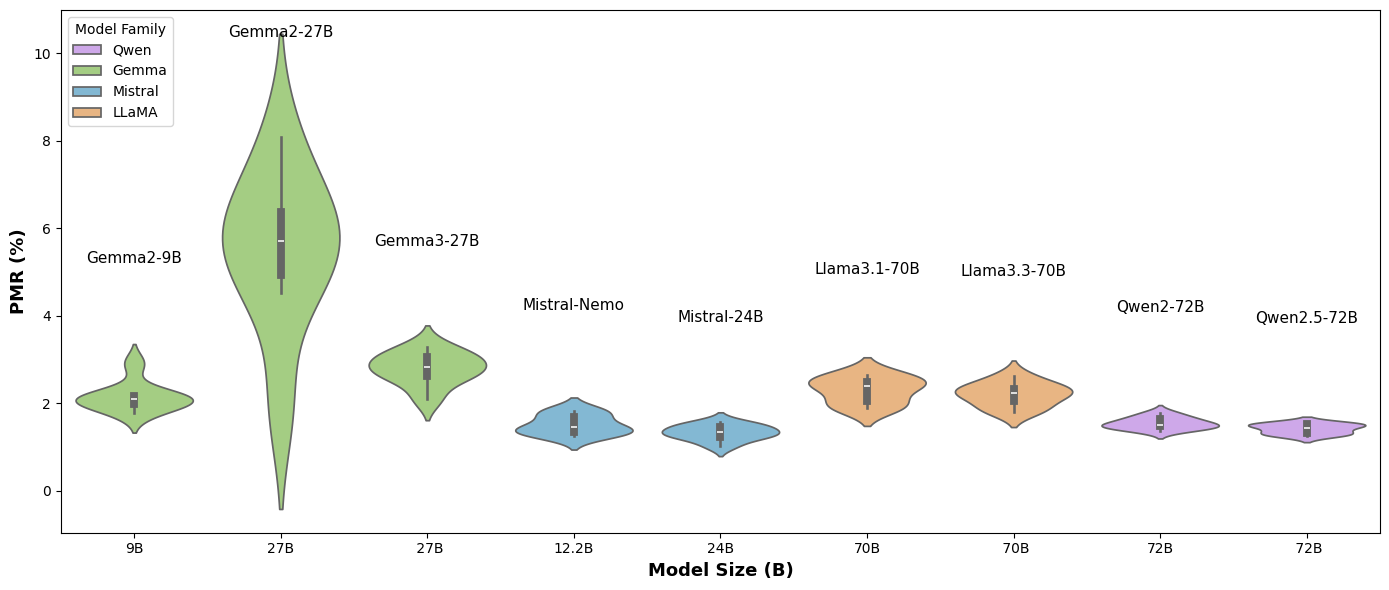

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import defaultdict

# Create PMR. DataFrame
pmr_values_only = pd.DataFrame({
    "Qwen2-72B":     [1.48, 1.53, 1.37, 1.62, 1.49, 1.43, 1.66, 1.78],
    "Qwen2.5-72B":   [1.53, 1.54, 1.32, 1.29, 1.41, 1.26, 1.52, 1.47],
    "Gemma2-9B":      [2.12, 2.15, 1.97, 2.21, 2.09, 1.77, 2.91, 1.99],
    "Gemma2-27B":     [6.28, 5.08, 5.54, 4.51, 5.88, 6.68, 1.95, 8.08],
    "Gemma3-27B":    [2.87, 2.78, 2.56, 2.10, 2.64, 3.04, 3.09, 3.29],
    "Mistral-24B":   [1.51, 1.35, 1.02, 1.43, 1.23, 1.22, 1.32, 1.56],
    "Mistral-Nemo":   [1.65, 1.40, 1.24, 1.32, 1.49, 1.36, 1.83, 1.82],
    "Llama3.1-70B":  [2.65, 2.43, 1.92, 1.88, 2.08, 2.36, 2.44, 2.63],
    "Llama3.3-70B":  [2.41, 2.11, 1.88, 1.81, 2.17, 2.31, 2.31, 2.62]
})

pmr_values_only["Culture"] = ["Arabic", "African", "Turkish", "Indian", "Persian", "Korean", "Chinese", "Japanese"]
pmr_long = pd.melt(pmr_values_only, id_vars="Culture", var_name="Model", value_name="PMR")

model_size_map = {
    "Gemma2-9B": "9", "Gemma2-27B": "27", "Gemma3-27B": " 27",
    "Mistral-Nemo": "12.2", "Mistral-24B": "24",
    "Llama3.1-70B": "70", "Llama3.3-70B": " 70",
    "Qwen2-72B": "72", "Qwen2.5-72B": " 72"
}

# Assign model sizes 
model_family_map = {
    "Gemma2-9B": "Gemma", "Gemma2-27B": "Gemma", "Gemma3-27B": "Gemma",
    "Mistral-Nemo": "Mistral", "Mistral-24B": "Mistral",
    "Llama3.1-70B": "LLaMA", "Llama3.3-70B": "LLaMA",
    "Qwen2-72B": "Qwen", "Qwen2.5-72B": "Qwen"
}
pmr_long["Model_Family"] = pmr_long["Model"].map(model_family_map)


#define colors
colors = {
    "Gemma": "#A3D977",    
    "Mistral": "#76BCE0",   
    "LLaMA": "#F9B572",    
    "Qwen": "#D09DF4"       
}


custom_order = ["9", "27", " 27", "12.2", "24", "70", " 70", "72", " 72"]
size_to_models = defaultdict(list)
for model, size in model_size_map.items():
    size_to_models[size].append(model)

model_to_label = {}
ordered_labels_unique = []

for size in custom_order:
    
    label = f"{size}B"
    if size in size_to_models:            
        models = ",".join(size_to_models[size])
        ordered_labels_unique.append(label)
        for model in size_to_models[size]:
            model_to_label[model] = (label, models)


pmr_long["Model_Size_Label"] = pmr_long["Model"].map(lambda m: model_to_label[m][0])
pmr_long["Model_Names"] = pmr_long["Model"].map(lambda m: model_to_label[m][1])


plt.figure(figsize=(14, 6))

ax = sns.violinplot(x="Model_Size_Label", y="PMR",hue="Model_Family", data=pmr_long, inner="box", scale="width", order= ordered_labels_unique, palette=colors)
ax.legend(title="Model Family", loc='upper left' )   ##, bbox_to_anchor=(1.01, 1 ))

for i, label in enumerate(ordered_labels_unique):
    models_here = pmr_long[pmr_long["Model_Size_Label"] == label]["Model_Names"].unique()[0]
    y_max = pmr_long[pmr_long["Model_Size_Label"] == label]["PMR"].max()
    ax.text(i, y_max+2.23 , models_here, ha='center', va='bottom', fontsize=11)


# plt.title("PMR Distribution Across Cultures by Model Size" , fontsize=13 , fontweight='bold')
plt.xlabel("Model Size (B)" , fontsize=13 , fontweight='bold')
plt.ylabel("PMR (%)" , fontsize=13  , fontweight='bold' )
# plt.axhline(y=50, color='gray', linestyle='--', linewidth=1.5)
plt.savefig("PMR_distribution.pdf", dpi=300, bbox_inches='tight')
# plt.grid(True)
plt.tight_layout()
plt.show()
